# Amazon.com ‘Chapstick’ 리뷰 스크래핑

⚫️ Introduction

화이자 제약이 코로나 백신 덕분에 지금은 모두가 다 아는 제약회사가 되었지만, 기존에는 병원에서 처방하는 항암제, 고혈압 약 등이 유명해 판매가 굉장히 잘 됐습니다. 협심증 치료하려고 연구했다가 부작용으로 개발됐다고 알려진 비아그라도 유명하지요. 소비자 제품은 코스트코에 입점 된 영양제인 센트륨이 있습니다. 또 들어보셨을 만한 것으로는 찹스틱 립밤이 있지요.

스크래핑은 아마존에서 하고 싶었고, 겨울엔 남녀노소 불문하고 립밤을 많이 사기 때문에 찹스틱 리뷰를 분석해 보고 싶었습니다.

우선 하나의 패키지 선정 후 리뷰 제목, 리뷰 내용을 뽑아 왜 좋아하고 왜 싫어하는지를 알고 싶었습니다. 제품의 강점은 무엇인지, 개선 방향은 어떠한 것들이 있을지를 피드백을 통해 알면, R&D, sales, marketing 또는 cs 측면에서 회사가 전략을 세우고 의사 결정을 내릴 수 있을 테니까요.

## I. 시작

In [1]:
import chromedriver_autoinstaller

import os
import pandas as pd
import numpy as np
import math

from selenium.webdriver.common.alert import Alert
from selenium import webdriver

from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains as AC

from tqdm import tqdm, tqdm_notebook
from tqdm.notebook import tqdm

import re

from time import sleep
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# search keyword
search="chapstick moisturizer original"

In [3]:
options=webdriver.ChromeOptions()  
options.add_argument("--window-size=800,1200")

In [4]:
# go to amazon.com
chrome_path=chromedriver_autoinstaller.install()
driver=webdriver.Chrome(chrome_path, options=options)

driver.get("https://www.amazon.com/")
time.sleep(1)

In [5]:
# search the keyword
element=driver.find_element_by_name("field-keywords")
element.clear()

element.send_keys(search)
element.submit()
time.sleep(1)

In [6]:
# click item reviews
element=driver.find_element_by_css_selector("div.a-row.a-size-small > span > a > span")
element.click()
time.sleep(1)

In [7]:
# see all reviews
element=driver.find_element_by_css_selector(".a-link-emphasis.a-text-bold")
element.click()
time.sleep(1)

## II. 리뷰 크롤링

### II-1. 긍정적 리뷰 크롤링

In [8]:
# see all positive reviews
element=driver.find_element_by_css_selector(".a-size-base.a-link-normal.see-all")
element.click()
time.sleep(1)

In [10]:
# first page scraping test

In [10]:
subject_list_p = []
review_list_p = []

In [12]:
overlays1 = ".a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold"
subjects = driver.find_elements_by_css_selector(overlays1)

for subject in tqdm(subjects):    
    subject = subject.text
    subject_list_p.append(subject)

print(len(subject_list_p))
subject_list_p

  0%|          | 0/10 [00:00<?, ?it/s]

10


['Plain chapstick is the Way to Go!',
 "My Husband's Favorite For Years",
 'Works like a charm',
 "It's Chapstick!",
 'Plain and flavorless but works well',
 'My favorite chapstick',
 'More than just lips',
 'Great Value, Chapstick works wonders',
 'Best plain Chapstick.',
 'Finally A Chapstick That Works']

In [13]:
overlays="div.a-row.a-spacing-small.review-data > span"
reviews=driver.find_elements_by_css_selector(overlays)

for review in tqdm(reviews):    
    review=review.text
    review_list_p.append(review)

print(len(review_list_p))
review_list_p

  0%|          | 0/10 [00:00<?, ?it/s]

10


["There is just no way you can go wrong with plain old regular not flavored chapstick! I know most people won't even read a review of this because it's 'just' chapstick; we ALL know what we're getting right? But I have something to tell you that really did change my life and maybe yours also. I have been addicted to chapstick for as long as I can remember. I wanted every flavor! But in the last few years I started getting cracks at the corners of my mouth after eating certain food, mostly acidic, tomatoes, bbq sauces etc. There is a medical term for it, but it escapes me. After a little research I learned that the flavored chapstick fuel this fire but these plain, unflavored, moisturizing ones will help. The cracks can be very painful so I definitely didn't want to add to that. Christmas came around one year and everyone know I loved chapstick, but I had to be very clear about not buying the flavors. It was a disappointment for all, myself included. But all in all, I was able to make t

In [ ]:
# scrape positive reviews - 10 reveiws per page

In [9]:
subject_list_p = []
review_list_p = []

In [10]:
for i in range(0,7):
    if i == 0:
        overlays1 = ".a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold"
        subjects = driver.find_elements_by_css_selector(overlays1)

        for subject in tqdm(subjects):    
            subject = subject.text
            subject_list_p.append(subject)

        overlays="div.a-row.a-spacing-small.review-data > span"
        reviews=driver.find_elements_by_css_selector(overlays)

        for review in tqdm(reviews):    
            review=review.text
            review_list_p.append(review)
            
        print('subject len: ', len(subject))
        print('review len: ', len(review))
        
    else:
        try:
            driver.find_element_by_css_selector(".a-last").click()
            time.sleep(1)

            overlays1 = ".a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold"
            subjects = driver.find_elements_by_css_selector(overlays1)

            for subject in tqdm(subjects):    
                subject = subject.text
                subject_list_p.append(subject)

            overlays="div.a-row.a-spacing-small.review-data > span"
            reviews=driver.find_elements_by_css_selector(overlays)

            for review in tqdm(reviews):    
                review=review.text
                review_list_p.append(review)

            print('subject len: ', len(subject))
            print('review len: ', len(review))

            i += 1

            if i == 7:
                break

        except:
            break

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  30
review len:  575


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  16
review len:  312


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  12
review len:  235


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  25
review len:  165


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  28
review len:  135


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  9
review len:  118


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  8
review len:  103


In [11]:
df_p = pd.DataFrame({"subject": subject_list_p, "reviews": review_list_p})
df_p

,subject,reviews
0,Plain chapstick is the Way to Go!,There is just no way you can go wrong with pla...
1,My Husband's Favorite For Years,My husband is a mailman in Phoenix Arizona. He...
2,Works like a charm,You know how some chapsticks seem really hydra...
3,Plain and flavorless but works well,"If you like chapstick with no flavor or smell,..."
4,It's Chapstick!,What can I say? It's Chapstick! This stuff is ...
...,...,...
65,An old faithful fave.,What's not to like? I Keep this old standard e...
66,Happy to have found this online,Brand new and in original sealed container. So...
67,It is ChapStick!!!,Purchased for my husband because he likes the ...
68,Favorite Chapstick,"Been using this chapstick forever, its great. ..."


In [12]:
# drop duplicates
df_p_fin = df_p.drop_duplicates()
df_p_fin

,subject,reviews
0,Plain chapstick is the Way to Go!,There is just no way you can go wrong with pla...
1,My Husband's Favorite For Years,My husband is a mailman in Phoenix Arizona. He...
2,Works like a charm,You know how some chapsticks seem really hydra...
3,Plain and flavorless but works well,"If you like chapstick with no flavor or smell,..."
4,It's Chapstick!,What can I say? It's Chapstick! This stuff is ...
...,...,...
65,An old faithful fave.,What's not to like? I Keep this old standard e...
66,Happy to have found this online,Brand new and in original sealed container. So...
67,It is ChapStick!!!,Purchased for my husband because he likes the ...
68,Favorite Chapstick,"Been using this chapstick forever, its great. ..."


In [13]:
# add a column
df_p_fin["p/c"] = "positive"
print(df_p_fin)

                                subject  \
0     Plain chapstick is the Way to Go!   
1       My Husband's Favorite For Years   
2                    Works like a charm   
3   Plain and flavorless but works well   
4                       It's Chapstick!   
..                                  ...   
65                An old faithful fave.   
66      Happy to have found this online   
67                   It is ChapStick!!!   
68                   Favorite Chapstick   
69                             lipgloss   

                                              reviews       p/c  
0   There is just no way you can go wrong with pla...  positive  
1   My husband is a mailman in Phoenix Arizona. He...  positive  
2   You know how some chapsticks seem really hydra...  positive  
3   If you like chapstick with no flavor or smell,...  positive  
4   What can I say? It's Chapstick! This stuff is ...  positive  
..                                                ...       ...  
65  What's not to lik

In [14]:
# create text file
df_p_fin.to_csv("chapstick_reviews_p.text")

### II-2. 부정적 리뷰 크롤링

In [15]:
# see all critical reviews
element1=driver.find_element_by_css_selector(".a-column.a-span6.view-point-review.critical-review.a-span-last .a-row.a-spacing-mini .a-size-base.a-link-normal.see-all")
element1.click()
time.sleep(1)

In [20]:
# scrape critical reviews - 10 reviews per page

In [18]:
subject_list_c = []
review_list_c = []

In [19]:
for i in range(0,7):
    if i == 0:
        overlays5=".a-section.celwidget .a-row .a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold"
        subjects2=driver.find_elements_by_css_selector(overlays5)

        for subject2 in tqdm(subjects2):    
            subject2=subject2.text
            subject_list_c.append(subject2)

        overlays6="div.a-row.a-spacing-small.review-data > span"
        reviews2=driver.find_elements_by_css_selector(overlays6)

        for review2 in tqdm(reviews2):    
            review2=review2.text
            review_list_c.append(review2)
            
        print('subject len: ', len(subject))
        print('review len: ', len(review))
        
    else:
        try:
            driver.find_element_by_css_selector(".a-last").click()
            time.sleep(1)

            overlays5=".a-section.celwidget .a-row .a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold"
            subjects2=driver.find_elements_by_css_selector(overlays5)

            for subject2 in tqdm(subjects2):    
                subject2=subject2.text
                subject_list_c.append(subject2)

            overlays6="div.a-row.a-spacing-small.review-data > span"
            reviews2=driver.find_elements_by_css_selector(overlays6)

            for review2 in tqdm(reviews2):    
                review2=review2.text
                review_list_c.append(review2)

            print('subject len: ', len(subject2))
            print('review len: ', len(review2))

            i += 1

            if i == 7:
                break

        except:
            break

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  7
review len:  114


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  24
review len:  149


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  19
review len:  149


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  16
review len:  77


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  50
review len:  127


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  22
review len:  6


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

subject len:  12
review len:  36


In [20]:
df_c = pd.DataFrame({"subject": subject_list_c, "reviews": review_list_c})
df_c

,subject,reviews
0,"Vaseline works much better for cracked lips, C...",I used chapstick when I was a kid so I figured...
1,"Repulsive ""new formula"" ruined what was an ine...","This review is for the ""new formula"" version o..."
2,Not original chapstick!,I thought since it said it was original chapst...
3,"Great “flavor”, disappointingly Un-moisturizing",The only reason I gave this ChapStick a 3 star...
4,WHY CHANGE A GOOD THING???,"I've been using this product for years now, an..."
...,...,...
65,Tastes like industrial solvents,It has a terrible taste and smell like industr...
66,Mediocre at Best,"You really have to work to get any moisture, b..."
67,Defective,All of my chapsticks were melted when I opened...
68,I ordered (silly me) several packages of this ...,I ordered (silly me) several packages of this ...


In [21]:
# drop duplicates
df_c_fin = df_c.drop_duplicates()
df_c_fin

,subject,reviews
0,"Vaseline works much better for cracked lips, C...",I used chapstick when I was a kid so I figured...
1,"Repulsive ""new formula"" ruined what was an ine...","This review is for the ""new formula"" version o..."
2,Not original chapstick!,I thought since it said it was original chapst...
3,"Great “flavor”, disappointingly Un-moisturizing",The only reason I gave this ChapStick a 3 star...
4,WHY CHANGE A GOOD THING???,"I've been using this product for years now, an..."
...,...,...
65,Tastes like industrial solvents,It has a terrible taste and smell like industr...
66,Mediocre at Best,"You really have to work to get any moisture, b..."
67,Defective,All of my chapsticks were melted when I opened...
68,I ordered (silly me) several packages of this ...,I ordered (silly me) several packages of this ...


In [22]:
# add a column
df_c_fin["p/c"] = "critical"
print(df_c_fin)

                                              subject  \
0   Vaseline works much better for cracked lips, C...   
1   Repulsive "new formula" ruined what was an ine...   
2                             Not original chapstick!   
3     Great “flavor”, disappointingly Un-moisturizing   
4                          WHY CHANGE A GOOD THING???   
..                                                ...   
65                    Tastes like industrial solvents   
66                                   Mediocre at Best   
67                                          Defective   
68  I ordered (silly me) several packages of this ...   
69                                       it’s alright   

                                              reviews       p/c  
0   I used chapstick when I was a kid so I figured...  critical  
1   This review is for the "new formula" version o...  critical  
2   I thought since it said it was original chapst...  critical  
3   The only reason I gave this ChapStick a 3 star.

In [23]:
# create text file
df_c_fin.to_csv("chapstick_reviews_c.text")

## III. 엑셀 파일

In [24]:
# combine two different dataframes
df_fin_fin = pd.DataFrame.append(df_p_fin, df_c_fin)
df_fin_fin

,subject,reviews,p/c
0,Plain chapstick is the Way to Go!,There is just no way you can go wrong with pla...,positive
1,My Husband's Favorite For Years,My husband is a mailman in Phoenix Arizona. He...,positive
2,Works like a charm,You know how some chapsticks seem really hydra...,positive
3,Plain and flavorless but works well,"If you like chapstick with no flavor or smell,...",positive
4,It's Chapstick!,What can I say? It's Chapstick! This stuff is ...,positive
...,...,...,...
65,Tastes like industrial solvents,It has a terrible taste and smell like industr...,critical
66,Mediocre at Best,"You really have to work to get any moisture, b...",critical
67,Defective,All of my chapsticks were melted when I opened...,critical
68,I ordered (silly me) several packages of this ...,I ordered (silly me) several packages of this ...,critical


In [25]:
# reset index
df_fin_fin_fin = df_fin_fin.reset_index().drop(["index"], axis="columns")
df_fin_fin_fin

,subject,reviews,p/c
0,Plain chapstick is the Way to Go!,There is just no way you can go wrong with pla...,positive
1,My Husband's Favorite For Years,My husband is a mailman in Phoenix Arizona. He...,positive
2,Works like a charm,You know how some chapsticks seem really hydra...,positive
3,Plain and flavorless but works well,"If you like chapstick with no flavor or smell,...",positive
4,It's Chapstick!,What can I say? It's Chapstick! This stuff is ...,positive
...,...,...,...
135,Tastes like industrial solvents,It has a terrible taste and smell like industr...,critical
136,Mediocre at Best,"You really have to work to get any moisture, b...",critical
137,Defective,All of my chapsticks were melted when I opened...,critical
138,I ordered (silly me) several packages of this ...,I ordered (silly me) several packages of this ...,critical


In [29]:
# create excel file
df_fin_fin_fin.to_excel("chapstick_reviews_amazon.xlsx", encoding='utf-8-sig')

## IV. 시각화

### IV-1. 파이 차트 - 제품 리뷰의 평균 별점

In [16]:
import matplotlib.pyplot as plt

In [17]:
five_star = driver.find_element_by_xpath("//*[@id=\"histogramTable\"]/tbody/tr[1]/td[3]/span[2]")
four_star = driver.find_element_by_xpath("//*[@id=\"histogramTable\"]/tbody/tr[2]/td[3]/span[2]/a")
three_star = driver.find_element_by_xpath("//*[@id=\"histogramTable\"]/tbody/tr[3]/td[3]/span[2]/a")
two_star = driver.find_element_by_xpath("//*[@id=\"histogramTable\"]/tbody/tr[4]/td[3]/span[2]/a")
one_star = driver.find_element_by_xpath("//*[@id=\"histogramTable\"]/tbody/tr[5]/td[3]/span[2]/a")

five_int = int(five_star.text.replace("%",""))
four_int = int(four_star.text.replace("%",""))
three_int = int(three_star.text.replace("%",""))
two_int = int(two_star.text.replace("%",""))
one_int = int(one_star.text.replace("%",""))

print(five_int)
print(four_int)
print(three_int)
print(two_int)
print(one_int)

driver.close()

88
8
3
1
1


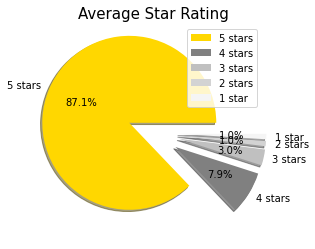

In [28]:
data = [five_int, four_int, three_int, two_int, one_int]
categories = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']

explode = [0.3, 0.3, 0.3, 0.3, 0.3]
colors = ['gold', 'gray', 'silver', 'lightgray', 'whitesmoke']

plt.title('''Average Star Rating''',size = 15)
plt.pie(data, explode = explode, labels=categories, autopct = '%0.1f%%', shadow=True, colors=colors)
plt.legend(categories);

### IV-2. 바 차트 & 워드 클라우드 - 빈출 단어

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import graphviz

from sklearn.tree import export_graphviz
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
from konlpy.tag import Okt; t = Okt()
from nltk.tokenize import TweetTokenizer
from PIL import Image

### IV-2-1. 긍정적 리뷰

In [22]:
data = open("/Users/yoonju/Desktop/(Basic) Data Analysis/0. Practice/0-1. crawling/amazon/chapstick_reviews_p.text").read().lower()

In [23]:
tokens_ko = t.morphs(data)
tokens_ko

[',',
 'subject',
 ',',
 'reviews',
 ',',
 'p',
 '/',
 'c',
 '\n',
 '0',
 ',',
 'plain',
 'chapstick',
 'is',
 'the',
 'way',
 'to',
 'go',
 '!,"',
 'there',
 'is',
 'just',
 'no',
 'way',
 'you',
 'can',
 'go',
 'wrong',
 'with',
 'plain',
 'old',
 'regular',
 'not',
 'flavored',
 'chapstick',
 '!',
 'i',
 'know',
 'most',
 'people',
 'won',
 "'",
 't',
 'even',
 'read',
 'a',
 'review',
 'of',
 'this',
 'because',
 'it',
 "'",
 's',
 "'",
 'just',
 "'",
 'chapstick',
 ';',
 'we',
 'all',
 'know',
 'what',
 'we',
 "'",
 're',
 'getting',
 'right',
 '?',
 'but',
 'i',
 'have',
 'something',
 'to',
 'tell',
 'you',
 'that',
 'really',
 'did',
 'change',
 'my',
 'life',
 'and',
 'maybe',
 'yours',
 'also',
 '.',
 'i',
 'have',
 'been',
 'addicted',
 'to',
 'chapstick',
 'for',
 'as',
 'long',
 'as',
 'i',
 'can',
 'remember',
 '.',
 'i',
 'wanted',
 'every',
 'flavor',
 '!',
 'but',
 'in',
 'the',
 'last',
 'few',
 'years',
 'i',
 'started',
 'getting',
 'cracks',
 'at',
 'the',
 'corner

In [24]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))
print(len(set(ko.tokens)))

5145
1029


In [25]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[(',', 213),
 ('.', 205),
 ('i', 170),
 ('the', 134),
 ('it', 134),
 ('and', 112),
 ("'", 111),
 ('to', 94),
 ('my', 89),
 ('a', 85),
 ('chapstick', 81),
 ('this', 78),
 ('\n', 77),
 ('for', 75),
 ('positive', 70),
 ('lips', 69),
 ('is', 58),
 ('of', 50),
 ('s', 46),
 ('t', 43),
 ('in', 40),
 ('have', 39),
 ('but', 35),
 ('that', 35),
 ('on', 32),
 ('.",', 31),
 ('one', 30),
 ('lip', 30),
 (',"', 29),
 ('so', 27),
 ('can', 26),
 ('me', 26),
 ('you', 25),
 ('like', 24),
 ('dry', 24),
 ('not', 23),
 ('as', 23),
 ('’', 23),
 ('use', 21),
 ('just', 20),
 ('with', 19),
 ('only', 19),
 ('they', 19),
 ('flavor', 18),
 ('very', 18),
 ('product', 18),
 ('works', 18),
 ('has', 18),
 ('.,', 18),
 ('no', 17)]

In [26]:
stop_words = ['.',',', '\n','\n ', '?','!','’','i','the','a','it','to','my','chapstick','positive','negative','is'\
             ,'critical','this','have','but','as','in','s','t','and','of','3',',"','\'','not','-','was','.,','""',\
              'chapsticks','for','that','on','.",','so','you','with','has','no','go','he','at','them','will',\
             'can','too','why','your','doesn','would','there','when','me','be','or','get','don','what','tube','did'\
             'had','didn','just','am','bought','one','use','an','after','these','are','much','more','really','three'\
             'did','had','buy','even','days','however','now','do','they','/','three','about','wrong','out','did',\
              'than','2','were','said','small','thing','carmex','off','very','feel','well','two','again','several',\
             'then','sun','because','got','awful','vaseline','from','little','&','item','tubes','sticks','bottom'\
             'reviews','which','started','another','says','least','guess','","','review','since','same','product',\
             'lips','original','lip','m','ve','does','ve','!,"','!",','!,','where','if','re','know','...','been']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('like', 24),
 ('dry', 24),
 ('only', 19),
 ('flavor', 18),
 ('works', 18),
 ('tried', 16),
 ('keep', 15),
 ('all', 14),
 ('great', 14),
 ('best', 14),
 ('balm', 13),
 ('long', 12),
 ('favorite', 12),
 ('price', 12),
 ('moisturizing', 11),
 ('good', 11),
 ('without', 11),
 ('using', 10),
 ('hours', 10),
 ('always', 10),
 ('plain', 9),
 ('flavored', 9),
 ('many', 9),
 ('day', 9),
 ('time', 9),
 ('winter', 9),
 ('stick', 9),
 ('moisturizer', 8),
 ('moist', 8),
 ('some', 8),
 ('find', 8),
 ('better', 8),
 ('amazon', 8),
 ('balms', 8),
 ('chapped', 8),
 ('chap', 8),
 ('love', 8),
 ('last', 7),
 ('years', 7),
 ('brand', 7),
 ('up', 7),
 ('skin', 7),
 ('still', 7),
 ('definitely', 6),
 ('work', 6),
 ('fine', 6),
 ('job', 6),
 ('moisturized', 6),
 ('pack', 6),
 ('other', 6)]

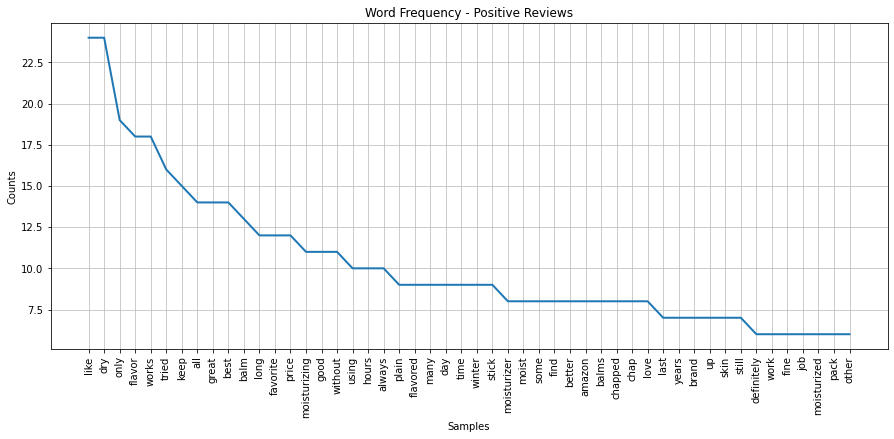

In [27]:
plt.figure(figsize=(15,6))

plt.title("Word Frequency - Positive Reviews")

ko.plot(50) 
plt.show()

In [28]:
data = ko.vocab().most_common(300)
data

[('like', 24),
 ('dry', 24),
 ('only', 19),
 ('flavor', 18),
 ('works', 18),
 ('tried', 16),
 ('keep', 15),
 ('all', 14),
 ('great', 14),
 ('best', 14),
 ('balm', 13),
 ('long', 12),
 ('favorite', 12),
 ('price', 12),
 ('moisturizing', 11),
 ('good', 11),
 ('without', 11),
 ('using', 10),
 ('hours', 10),
 ('always', 10),
 ('plain', 9),
 ('flavored', 9),
 ('many', 9),
 ('day', 9),
 ('time', 9),
 ('winter', 9),
 ('stick', 9),
 ('moisturizer', 8),
 ('moist', 8),
 ('some', 8),
 ('find', 8),
 ('better', 8),
 ('amazon', 8),
 ('balms', 8),
 ('chapped', 8),
 ('chap', 8),
 ('love', 8),
 ('last', 7),
 ('years', 7),
 ('brand', 7),
 ('up', 7),
 ('skin', 7),
 ('still', 7),
 ('definitely', 6),
 ('work', 6),
 ('fine', 6),
 ('job', 6),
 ('moisturized', 6),
 ('pack', 6),
 ('other', 6),
 ('way', 5),
 ('life', 5),
 ('also', 5),
 ('every', 5),
 ('few', 5),
 ('happy', 5),
 ('particular', 5),
 ('ll', 5),
 ('before', 5),
 ('water', 5),
 ('purse', 5),
 ('bag', 5),
 ('put', 5),
 ('lot', 5),
 ('once', 5),
 ('mo

In [29]:
img = Image.open('pfizer-logo.jpeg')
mask = np.array(img)

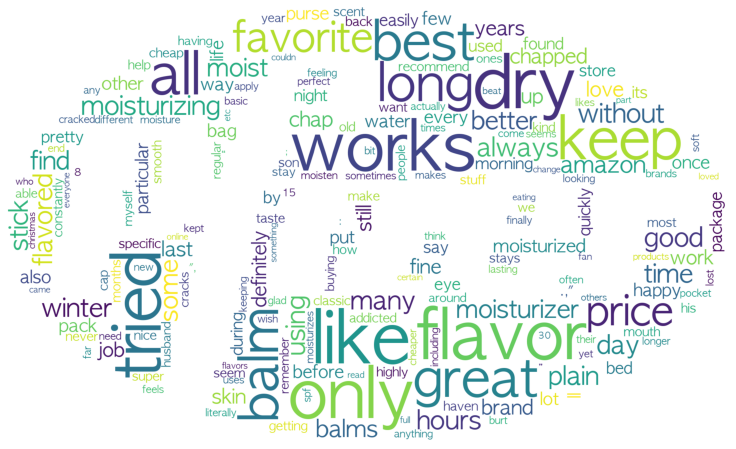

In [30]:
wordcloud = WordCloud(font_path='AppleGothic',
                      relative_scaling = 0.2, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      mask=mask
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### IV-2-2. 부정적 리뷰

In [55]:
data_ = open("/Users/yoonju/Desktop/(Basic) Data Analysis/0. Practice/0-1. crawling/amazon/chapstick_reviews_c.text").read().lower()

In [56]:
tokens_ko_ = t.morphs(data_)
tokens_ko_

[',',
 'subject',
 ',',
 'reviews',
 ',',
 'p',
 '/',
 'c',
 '\n',
 '0',
 ',"',
 'vaseline',
 'works',
 'much',
 'better',
 'for',
 'cracked',
 'lips',
 ',',
 'chapstick',
 'false',
 'advertising',
 '...","',
 'i',
 'used',
 'chapstick',
 'when',
 'i',
 'was',
 'a',
 'kid',
 'so',
 'i',
 'figured',
 'why',
 'not',
 'try',
 'it',
 'again',
 'when',
 'i',
 'was',
 'experiencing',
 'cracked',
 'bleeding',
 'lips',
 '.',
 'i',
 'applied',
 'chapstick',
 'for',
 'several',
 'weeks',
 'but',
 'saw',
 'no',
 'big',
 'improvement',
 '.',
 'so',
 ',',
 'i',
 'bought',
 'vaseline',
 'healing',
 'jelly',
 'and',
 'within',
 '3',
 'days',
 ',',
 'my',
 'lips',
 'started',
 'to',
 'heal',
 '.',
 'i',
 'then',
 'looked',
 'at',
 'the',
 'ingredients',
 'and',
 'the',
 'chapstick',
 'only',
 'has',
 '42%',
 'white',
 'petroleum',
 ',',
 'which',
 'is',
 'the',
 'main',
 'ingredient',
 'for',
 'healing',
 'ones',
 'lips',
 '.',
 'the',
 'vaseline',
 ',',
 'however',
 ',',
 'is',
 '100%',
 'white',
 'p

In [57]:
ko_ = nltk.Text(tokens_ko_)   
print(len(ko_.tokens))
print(len(set(ko_.tokens)))

3310
785


In [58]:
ko_ = nltk.Text(tokens_ko_)
ko_.vocab().most_common(50)

[(',', 186),
 ('the', 109),
 ('.', 107),
 ('i', 92),
 ('it', 77),
 ('\n', 73),
 ('critical', 70),
 ('a', 61),
 ('and', 58),
 ('not', 56),
 ('to', 52),
 ('of', 50),
 ('is', 48),
 ('this', 46),
 ('lips', 37),
 ('t', 37),
 ('chapstick', 35),
 ('my', 34),
 ('for', 33),
 ("'", 32),
 ('was', 30),
 (',"', 28),
 ('.,', 27),
 ('product', 26),
 ('that', 25),
 ('.",', 25),
 ('’', 24),
 ('but', 23),
 ('in', 22),
 ('as', 17),
 ('so', 16),
 ('on', 16),
 ('original', 16),
 ('like', 15),
 ('be', 15),
 ('one', 14),
 ('good', 14),
 ('me', 13),
 ('when', 12),
 ('use', 12),
 ('s', 12),
 ('""', 12),
 ('lip', 12),
 ('flavor', 11),
 ('-', 11),
 ('after', 11),
 ('these', 11),
 ('an', 10),
 ('using', 10),
 ('out', 10)]

In [59]:
stop_words = ['.',',', '\n','\n ', '?','!','’','i','the','a','it','to','my','chapstick','positive','negative','is'\
             ,'critical','this','have','but','as','in','s','t','and','of','3',',"','\'','not','-','was','.,','""',\
              'chapsticks','for','that','on','.",','so','you','with','has','no','go','he','at','them','will',\
             'can','too','why','your','doesn','would','there','when','me','be','or','get','don','what','tube','did'\
             'had','didn','just','am','bought','one','use','an','after','these','are','much','more','really','three'\
             'did','had','buy','even','days','however','now','do','they','/','three','about','wrong','out','did',\
              'than','2','were','said','thing','carmex','off','very','feel','well','two','again','several',\
             'then','sun','because','got','vaseline','from','&','item','reviews','which','started','another','says',\
              'least','guess','","','review','since','same','product','lips','original','lip','been']

tokens_ko_ = [each_word for each_word in tokens_ko_
             if each_word not in stop_words]

ko_ = nltk.Text(tokens_ko_)
ko_.vocab().most_common(50)

[('like', 15),
 ('good', 14),
 ('flavor', 11),
 ('using', 10),
 ('dry', 10),
 ('up', 10),
 ('better', 9),
 ('used', 9),
 ('only', 9),
 ('all', 9),
 ('defective', 9),
 ('balm', 9),
 ('works', 8),
 ('formula', 8),
 ('moisturizing', 8),
 ('new', 7),
 ('package', 7),
 ('other', 7),
 ('stick', 7),
 ('moisturizer', 6),
 ('back', 6),
 ('work', 6),
 ('price', 6),
 ('brand', 6),
 ('quality', 5),
 ('smell', 5),
 ('white', 4),
 ('small', 4),
 ('probably', 4),
 ('black', 4),
 ('sweet', 4),
 ('moisture', 4),
 ('case', 4),
 ('definitely', 4),
 ('recommend', 4),
 ('noticed', 4),
 ('scent', 4),
 ('nothing', 4),
 ('order', 4),
 ('protection', 4),
 ('chapped', 4),
 ('awful', 4),
 ('little', 4),
 ('vanilla', 4),
 ('tubes', 4),
 ('sticks', 4),
 ('bottom', 4),
 ('cracked', 3),
 ('healing', 3),
 ('taste', 3)]

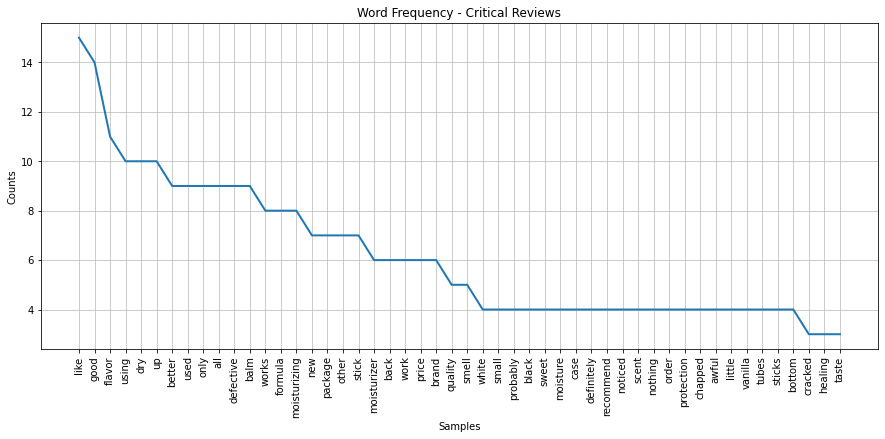

In [60]:
plt.figure(figsize=(15,6))

plt.title("Word Frequency - Critical Reviews")

ko_.plot(50) 
plt.show()

In [61]:
data_ = ko.vocab().most_common(300)
data_

[('dry', 25),
 ('like', 24),
 ('only', 19),
 ('works', 19),
 ('flavor', 18),
 ('tried', 16),
 ('great', 15),
 ('best', 15),
 ('keep', 14),
 ('all', 13),
 ('balm', 13),
 ('long', 12),
 ('favorite', 12),
 ('price', 12),
 ('moisturizing', 11),
 ('good', 11),
 ('using', 10),
 ('hours', 10),
 ('always', 10),
 ('time', 10),
 ('without', 10),
 ('plain', 9),
 ('flavored', 9),
 ('many', 9),
 ('day', 9),
 ('find', 9),
 ('winter', 9),
 ('stick', 9),
 ('love', 9),
 ('moisturizer', 8),
 ('moist', 8),
 ('some', 8),
 ('better', 8),
 ('amazon', 8),
 ('balms', 8),
 ('chapped', 8),
 ('chap', 8),
 ('last', 7),
 ('years', 7),
 ('brand', 7),
 ('up', 7),
 ('skin', 7),
 ('still', 7),
 ('pack', 7),
 ('definitely', 6),
 ('work', 6),
 ('fine', 6),
 ('job', 6),
 ('moisturized', 6),
 ('other', 6),
 ('way', 5),
 ('life', 5),
 ('also', 5),
 ('few', 5),
 ('happy', 5),
 ('particular', 5),
 ('ll', 5),
 ('before', 5),
 ('water', 5),
 ('purse', 5),
 ('bag', 5),
 ('put', 5),
 ('lot', 5),
 ('once', 5),
 ('morning', 5),
 (

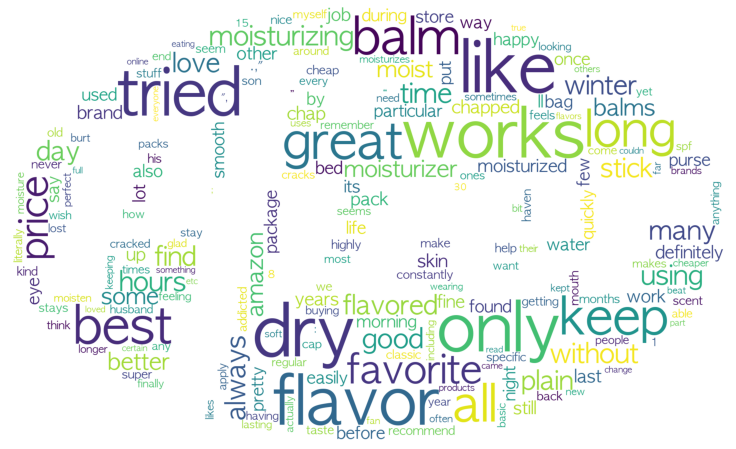

In [62]:
wordcloud = WordCloud(font_path='AppleGothic',
                      relative_scaling = 0.2, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      mask=mask
                      ).generate_from_frequencies(dict(data_))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()